# Esercizio 2 - Riconoscimento di un filtro

L'obiettivo è riconoscere il tipo di filtro applicato per ottenere il risultato in figura

In [1]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve

import cv2
import imageio
import skimage.filters
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib inline 

plt.rcParams['figure.figsize'] = (10, 8)

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, **kwargs)

Data l'immagine in input

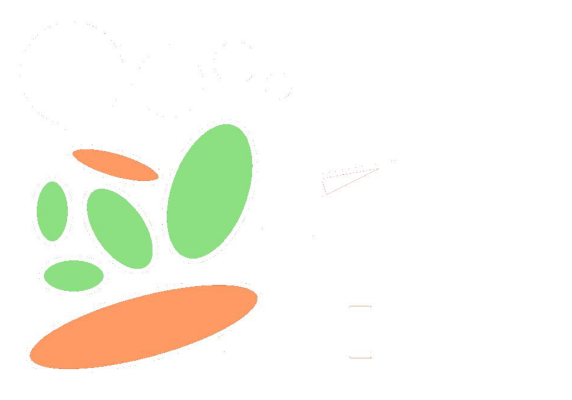

In [2]:
image_input = imageio.imread('ovali.jpg')

myimshow(image_input)

e analizzando il risultato del filtro è necessario riconoscere e replicare il processo.

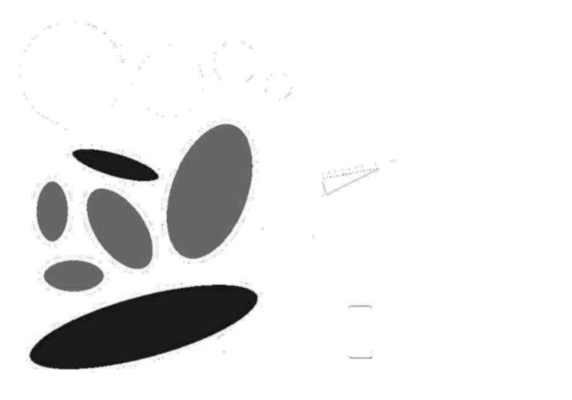

In [3]:
# risultato
filtro_target = imageio.imread('filter2.jpg')

myimshow(filtro_target, cmap='gray')

Per riconoscere il filtro è utile osseervare l'effetto sui bordi delle figure, se c'è un effetto distorsivo, ecc.

In questo caso i bordi sono ben definiti ed è presente un riempimento delle figure, quindi molto probabilmente è stato applicato un filtro gaussiano. 

Verifica dell'ipotesi.

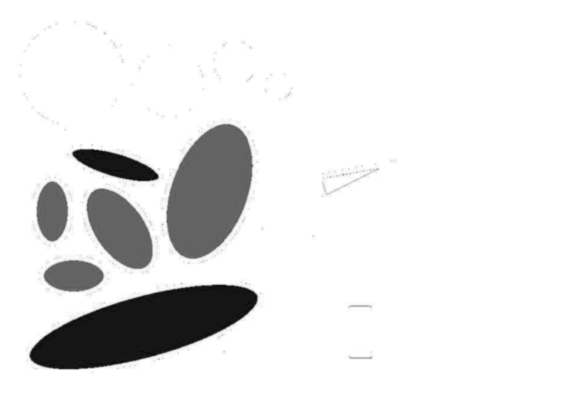

In [4]:
grey_image = rgb2gray(image_input)

risultato_filtro_ipotesi = skimage.filters.gaussian(grey_image)

myimshow(risultato_filtro_ipotesi, cmap='gray')

Verifica dell'ipotesi sul dettaglio dell'immagine e confronto con un filtro alternativo ma plausibile

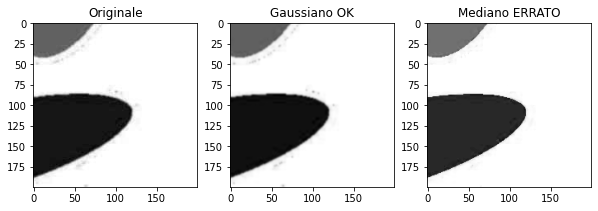

In [5]:
idx, idy = 380, 300
sz = 200


# FILTRO ALTERNATIVO
risultato_filtro_ipotesi_2 = skimage.filters.median(grey_image)


# CONFRONTO
filtro_target_patch = filtro_target[idx:idx+sz, idy:idy+sz]
filtro_ipotesi_patch = risultato_filtro_ipotesi[idx:idx+sz, idy:idy+sz]
filtro_errato_patch = risultato_filtro_ipotesi_2[idx:idx+sz, idy:idy+sz]

fix, axes = plt.subplots(1, 3)

axes = axes.ravel()

axes[0].imshow(filtro_target_patch, cmap='gray')
axes[0].set_title('Originale')
axes[1].imshow(filtro_ipotesi_patch, cmap='gray')
axes[1].set_title('Gaussiano OK')
axes[2].imshow(filtro_errato_patch, cmap='gray')
axes[2].set_title('Mediano ERRATO')
plt.show()

il filtro gaussiano è quello più simile all'immagine originale. In quello mediano si possono vedere i contorni ben definiti mentre nell'immagine originale non lo sono

## Altra immagine di esempio

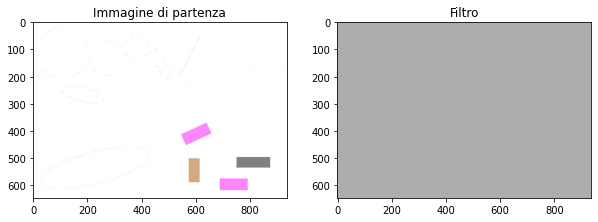

In [6]:
image_f2b = imageio.imread('rettangoli.jpg')
filtro_f2b = imageio.imread('filter2b.jpg')

fix, axes = plt.subplots(1, 2)

axes = axes.ravel()

axes[0].imshow(image_f2b)
axes[0].set_title('Immagine di partenza')
axes[1].imshow(filtro_f2b, cmap='gray')
axes[1].set_title('Filtro')

plt.show()

ingrandimento del risultato del filtro

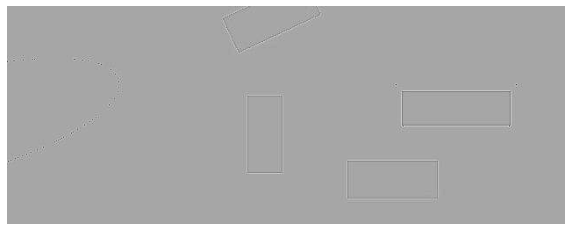

In [7]:
myimshow(filtro_f2b[400:, 300:], cmap='gray')

Si vedono i bordi dei rettangoli, risultati con 2 tipi di filtri:

1. laplaciano
2. sobel

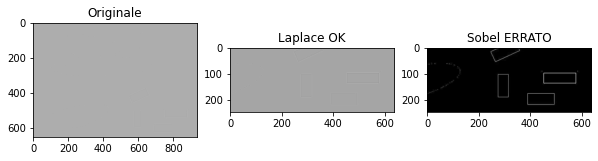

In [8]:
grey_image_f2b = rgb2gray(image_f2b)

risultato_filtro2b_ipotesi_1 = skimage.filters.laplace(grey_image_f2b)

# FILTRO ALTERNATIVO
risultato_filtro2b_ipotesi_2 = skimage.filters.sobel(grey_image_f2b)


# CONFRONTO
filtro_target_patch = filtro_f2b[400:, 300:]
filtro_ipotesi_patch = risultato_filtro2b_ipotesi_1[400:, 300:]
filtro_errato_patch = risultato_filtro2b_ipotesi_2[400:, 300:]

fix, axes = plt.subplots(1, 3)

axes = axes.ravel()

axes[0].imshow(filtro_f2b, cmap='gray')
axes[0].set_title('Originale')
axes[1].imshow(filtro_ipotesi_patch, cmap='gray')
axes[1].set_title('Laplace OK')
axes[2].imshow(filtro_errato_patch, cmap='gray')
axes[2].set_title('Sobel ERRATO')
plt.show()

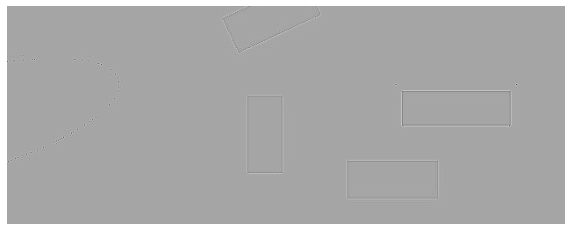

In [9]:
# dettaglio filtro laplace
myimshow(risultato_filtro2b_ipotesi_1[400:, 300:], cmap='gray')

# Esercizio 3

Mostrare gli effetti e spiegare cosa succedequando si applica due volte un filtro gaussiano

Data un'immagine _img_ applicare il filtro gaussiano G

img1 = G(G(img))

A cosa equivale questa trasformazione?

**Risposta:**

G è un filtro gaussiano, applicandolo 2 volte, a meno di effetti di approssimazione, sto applicando un filtro gaussiano con varianza doppia.



# Esercizio 4

Identificare i cerchi verdi tramite trasformata di Hough segnandoli con una X.

Si identificano i cerchi tramite trasformata di Hough. Per ottenere un risultato ottimale è necessario impostare i seguenti parametri

- **method**	Detection method
- **dp**	Inverse ratio of the accumulator resolution to the image resolution. For example, if dp=1 , the accumulator has the same resolution as the input image
- **minDist**	Minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed.
- **param1**	First method-specific parameter. In case of HOUGH_GRADIENT, it is the higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller)
- **param2**	Second method-specific parameter. In case of HOUGH_GRADIENT, it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected.
- **minRadius**	Minimum circle radius.
- **maxRadius**	Maximum circle radius.

La strategie è quella di modificare l'immagine tramite un filtro per semplificare la detection dei bordi da parte dell'algoritmo Canny.

Poi si individuano i parametri ottimali dell'algoritmo di Hough

Infine si etichettano i cerchi individuati, eventualmente eliminando i cerchi in eccesso identificandoli dal colore oppure dalla posizione

#Cerchi individuati: 6
Circle center (108, 112), radius 87, color [141 194 178]
Circle center (274, 128), radius 65, color [141 194 178]
Circle center (382, 94), radius 37, color [141 194 178]
Circle center (488, 184), radius 22, color [141 194 178]
Circle center (470, 380), radius 41, color [255 121 154]
Circle center (454, 134), radius 23, color [141 194 178]


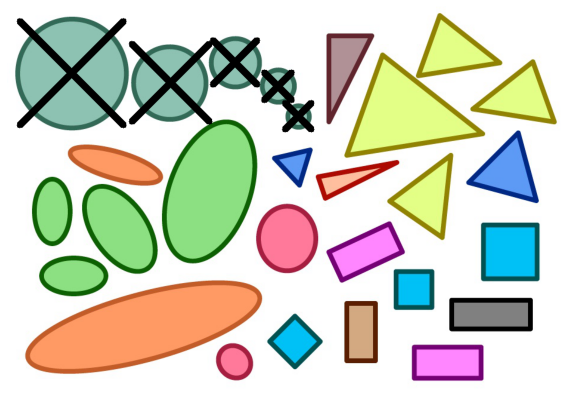

In [10]:
image_geometrics = imageio.imread('forme.jpg')

# identificazione dei cerchi

geometric_grey = rgb2gray(image_geometrics)
geometric_grey = skimage.filters.median(geometric_grey)

img = skimage.img_as_ubyte(geometric_grey)
circles_float = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 
                                 dp=1, minDist=20, 
                                 param1=100, param2=80, 
                                 minRadius=20, maxRadius=100)
if circles_float.any():
    circles = np.uint16(np.around(circles_float)).squeeze()
else:
    circles = np.empty(shape=(0,))

print('#Cerchi individuati:', circles.shape[0])

# PLOT
img2 = skimage.img_as_ubyte(image_geometrics)

for i in range(circles.shape[0]):
    c = (circles[i, 0], circles[i, 1])
    r = circles[i, 2]

    # cerchi in alto a sx
#    if c[1] < 250: 

    # cerchi di colore verde
    print(f'Circle center {c}, radius {r}, color {img2[c[1], c[0], :]}')
    if img2[c[1], c[0], 1] > 150: 
        pt1 = (c[0]-r, c[1]-r)
        pt2 = (c[0]+r, c[1]+r)
        cv2.line(img2, pt1, pt2, (0,0,0), 10)
        pt1 = (c[0]-r, c[1]+r)
        pt2 = (c[0]+r, c[1]-r)
        cv2.line(img2, pt1, pt2, (0,0,0), 10)
    
myimshow(img2);

# Esercizio 5

Definire una matrice di roto traslazione che effettua una rotazione di 60° in senso orario in (15, 7) e una traslazione di 50 px sull'asse y.

Mostrare e descrivere tutti i passaggi: dalla definizione della matrice all'applicazione della trasformazione.

## Come definire la Matrice di roto traslazione


Una generica Matrice di rotazione **R** è definita come


\begin{bmatrix}
\cos(\alpha) & -\sin(\alpha) & 0 \\ 
\sin(\alpha) & \cos(\alpha) & 0 \\ 
0 & 0 & 1 
\end{bmatrix}


Una matrice di Matrice di traslazione **T** è definita come

\begin{bmatrix}
1 & 0 & h \\ 
0 & 1 & k \\ 
0 & 0 & 1 
\end{bmatrix}


La Matrice di roto-traslazione che effettui prima la rotazione e poi la traslazione è ottenuta come

\begin{bmatrix}
\cos(\alpha) & -\sin(\alpha) & h \cos(\alpha) - k \sin(\alpha) \\ 
\sin(\alpha) & \cos(\alpha) & h \sin(\alpha) + k \cos(\alpha) \\ 
0 & 0 & 1 
\end{bmatrix}


Mentre la trasformazione _traslazione + rotazione_ è 

\begin{bmatrix}
\cos(\alpha) & -\sin(\alpha) & h \\ 
\sin(\alpha) & \cos(\alpha) & k \\ 
0 & 0 & 1 
\end{bmatrix}


Ricordando che la rotazione di un punto P rispetto ad un asse A(x,y) è data da

$$
P^* = T(A) * R(P) * T(-A) * P
$$

La matrice di roto traslazione di P rispetto a R in $P_1$ e successiva traslazione T di B(x,y) diventa

$$
M = T(B) * T(P_1) * R(\alpha) * T(-P_1)
$$

e di conseguenza 

$$
P^* = T(B) * T(P_1) * R(\alpha) * T(-P_1) * P
$$

Partendo dalla definizione si può creare un esempio numerico applicando la trasformazione tramite uno dei metodi messi a disposizione da OpenCV, SKimage, ecc.